## Personal Income per Capita and Poverty Rate (Draft)
- Personal Income was sourced from Dept of Commerce - Bureau of Economic Analysis
- Poverty Rate was sourced from the Census webiste

In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
# Read CSV files
# Poverty rate and population estimates. This is yearly data
poverty_data = ("../Data/Poverty_Data_Census_2020-2023.csv")
poverty_df = pd.read_csv(poverty_data)

# Per Capita Personal Income - This is quarterly data
personal_income = ("../Data/Quarterly_Per_Capita_Personal_Income_2020-2023.csv")
income_df = pd.read_csv(personal_income)


In [3]:
# Preview income_df
income_df

,GeoFips,GeoName,2020:Q1,2020:Q2,2020:Q3,2020:Q4,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2,2023:Q3,2023:Q4
0,0,United States,56595,60862,59742,59271,66742,63332,63609,64106,64766,65577,66822,67766,68684,69519,70140,70851
1,6000,California,66330,70512,72381,71363,78904,75699,76411,76261,75718,76032,77316,78658,79882,80970,81711,82408
2,12000,Florida,54623,58120,56829,56522,64412,60965,61225,62132,62542,63850,65426,66445,67737,68450,68870,69674
3,19000,Iowa,50072,54981,52333,53060,60425,57884,57479,57112,59942,61034,62515,62768,62417,62421,63021,63219
4,36000,New York,67345,72304,71836,69991,78487,74921,75068,75458,75781,76635,77936,79510,80213,82041,83247,83753
5,48000,Texas,53152,56358,55101,54613,62031,58871,59305,60504,61157,62427,63808,64522,65560,65860,66433,67093
6,50000,Vermont,55786,61509,57785,57243,64184,59713,59665,59933,61980,63041,64067,65408,65953,66818,66938,67991
7,53000,Washington,65145,69670,68225,67770,75634,72903,72680,73284,74232,74885,76222,77430,79061,80727,81359,82531


In [4]:
# Clean up income_df

# Remove GeoFips column
income_df = income_df.iloc[:,1:]

# Remove extra Vermont and Iowa from dataframe
income_df = income_df[(income_df['GeoName'] != 'Iowa') & (income_df['GeoName'] != 'Vermont')]

# Transpose the DataFrame
income_df = income_df.T

# Rename columns to country names
income_df = income_df.rename(columns=income_df.iloc[0])

# Reset Index
income_df = income_df.reset_index(names="Quarters")

# Remove first row
income_df = income_df.iloc[1:,:]

# Year splice + quarter splice loop
year = []
quarter = []
for i in income_df.iloc[:,0]:
    year.append(i[:4])
    quarter.append(i[5:])

# Insert columns into dataframe
income_df.insert(1,"Quarter",quarter)
income_df.insert(2,"Year",year)


# Preview income_df
income_df.head()

,Quarters,Quarter,Year,United States,California,Florida,New York,Texas,Washington
1,2020:Q1,Q1,2020,56595,66330,54623,67345,53152,65145
2,2020:Q2,Q2,2020,60862,70512,58120,72304,56358,69670
3,2020:Q3,Q3,2020,59742,72381,56829,71836,55101,68225
4,2020:Q4,Q4,2020,59271,71363,56522,69991,54613,67770
5,2021:Q1,Q1,2021,66742,78904,64412,78487,62031,75634


In [5]:
for column in (income_df.columns)[3:]:
    income_df[column] = income_df[column].astype(float)

In [6]:
income_df.describe()

,United States,California,Florida,New York,Texas,Washington
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,64899.000000,76284.750000,62988.875000,76532.875000,61049.687500,74484.875000
std,4184.319188,4381.899809,4718.035621,4685.974632,4478.184479,5079.557302
min,56595.000000,66330.000000,54623.000000,67345.000000,53152.000000,65145.000000
25%,62714.500000,74869.500000,60253.750000,74266.750000,58242.750000,71927.500000
50%,65171.500000,76336.000000,63196.000000,76208.000000,61594.000000,74558.500000
75%,67995.500000,79148.500000,66768.000000,79685.750000,64781.500000,77837.750000
max,70851.000000,82408.000000,69674.000000,83753.000000,67093.000000,82531.000000


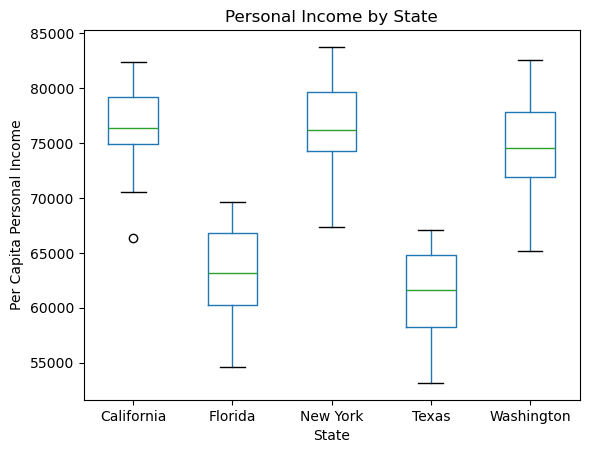

In [7]:
# Create a box plot 
income_df.boxplot(['California','Florida','New York','Texas','Washington'], grid=False) 
# Adding title and labels 
plt.title('Personal Income by State') 

# Suppress the default title 
plt.xlabel('State') 
plt.ylabel('Per Capita Personal Income') 
# Show plot 
plt.show()

In [10]:
# Calculate percent change in income per capita
income_df['US % Change'] = income_df['United States'].pct_change()
income_df['CA % Change'] = income_df['California'].pct_change()
income_df['FL % Change'] = income_df['Florida'].pct_change()
income_df['NY % Change'] = income_df['New York'].pct_change()
income_df['TX % Change'] = income_df['Texas'].pct_change()
income_df['WA % Change'] = income_df['Washington'].pct_change()

# filter these columns into a new dataframe
income_pc = income_df[['US % Change','CA % Change','FL % Change','NY % Change','TX % Change','WA % Change']]

In [11]:
# Display summary statistics for % Change in personal income per capita
income_pc.describe()

,US % Change,CA % Change,FL % Change,NY % Change,TX % Change,WA % Change
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.015797,0.015075,0.017141,0.015315,0.016387,0.016469
std,0.039873,0.033396,0.042086,0.038847,0.040805,0.035906
min,-0.051092,-0.040619,-0.053515,-0.045434,-0.050942,-0.036108
25%,0.006094,0.001092,0.005200,0.003121,0.005974,0.002385
50%,0.010295,0.009406,0.011674,0.008842,0.010793,0.012936
75%,0.013837,0.017122,0.020179,0.018586,0.020492,0.019459
max,0.126048,0.105671,0.139592,0.121387,0.135828,0.116040
